In [2]:
from google.colab import files
import pandas as pd
import requests
from bs4 import BeautifulSoup
import csv
import html5lib
import time
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

#Read in all NHL transactions and filter for trades only
df=pd.read_csv("Hockey_trades_2.csv")
trade_df = df[df['4'].str.contains("trade")]

In [3]:
#Current NHL teams
teams = {"Ducks":{},
"Coyotes":{},
"Bruins":{},
"Sabres":{},
"Flames":{},
"Hurricanes":{},
"Blackhawks":{},
"Avalanche":{},
"BlueJackets":{},
"Stars":{},
"RedWings":{},
"Oilers":{},
"Panthers":{},
"Kings":{},
"Wild":{},
"Canadiens":{},
"Predators":{},
"Devils":{},
"Islanders":{},
"Rangers":{},
"Senators":{},
"Flyers":{},
"Penguins":{},
"Sharks":{},
"Blues":{},
"Lightning":{},
"MapleLeafs":{},
"Canucks":{},
"GoldenKnights":{},
"Capitals":{},
"Jets":{},
                }

In [6]:
#Build nested dictionary of teams and their trade partners

for index, row in trade_df.iterrows():
    a = row["1"]
    for team in teams.keys():
      if team in row["4"]:
        b=team
        
        if a not in teams.keys():
          continue

        if b not in teams[a].keys():
          teams[a][b] = 1
        else:
          teams[a][b] += 1

#For some reason the csv indicated that a team had traded with itself. Remove these
for team in teams:
  if team in teams[team].keys():
    teams[team].pop(team, None)



In [7]:
#Construct the graph
#Edge weights correspond to number of transactions
G = nx.Graph()

for team in teams:
  G.add_node(team)

for team_A in teams:
  for team_B in teams[team_A]:
    G.add_edge(team_A, team_B, weight=teams[team_A][team_B])


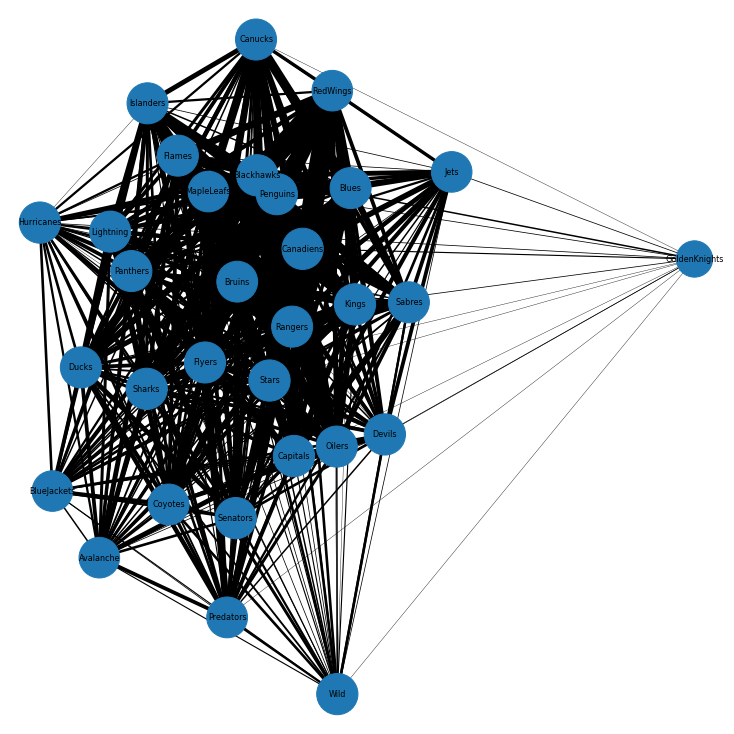

In [10]:
plt.figure(figsize=(10,10))

d = dict(G.degree)
weights = nx.get_edge_attributes(G,'weight').values()


#nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))
nx.draw(G, nodelist=d.keys(), width=[weight/8 for weight in weights], node_size=[np.log(v) * 500 for v in d.values()], with_labels=True, pos=nx.spring_layout(G),font_color='k',font_size=8)
plt.show()

In [11]:
nx.average_shortest_path_length(G)

1.0516129032258064

In [19]:
page_rank_dict = nx.pagerank(G)

In [24]:
cups_df=pd.read_csv("stanley_cup_data.csv")

In [25]:
cups_df.tail()

,Apps,Team,Wins,Losses,Win %,Season(s)
26,1,GoldenKnights,0,1,0.0,2018
27,0,Coyotes,0,0,0.0,0
28,0,BlueJackets,0,0,0.0,0
29,0,Wild,0,0,0.0,0
30,0,Jets,0,0,0.0,0


In [26]:
for index, row in cups_df.iterrows():
  team = row['Team']
  teams[team]['cup_appearances'] = row['Apps']
  teams[team]['cup_wins'] = row['Wins']
  teams[team]['cup_losses'] = row['Losses']
  teams[team]['cup_win_pct'] = row['Win %']



In [28]:
page_rank_list=[value for value in page_rank_dict.values()]
cup_app_list = []
for key in page_rank_dict:
  cup_app_list.append(teams[key]["cup_appearances"])

In [36]:
cup_win_pct_list = []
for key in page_rank_dict:
  cup_win_pct_list.append(teams[key]["cup_win_pct"])

In [39]:
len(page_rank_list)

31

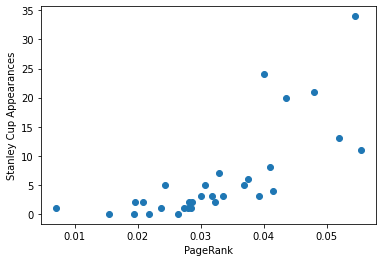

In [30]:
plt.xlabel("PageRank")
plt.ylabel("Stanley Cup Appearances")
plt.scatter(x=page_rank_list, y=cup_app_list)

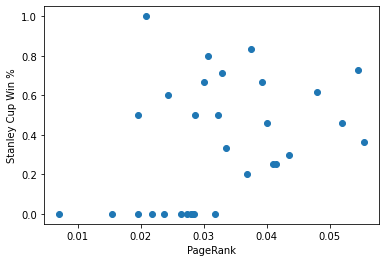

In [40]:
plt.xlabel("PageRank")
plt.ylabel("Stanley Cup Win %")
plt.scatter(x=page_rank_list, y=cup_win_pct_list)